In [907]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
%matplotlib widget
#%matplotlib qt

# Testing sklearn PCA

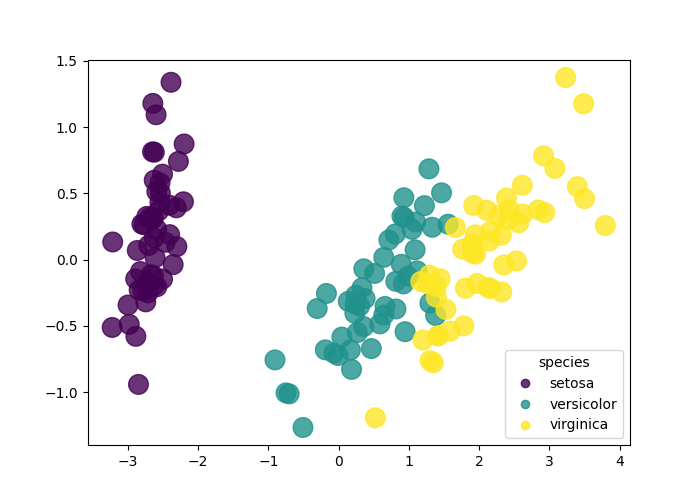

In [908]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

plt.figure(figsize=(7,5))
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

scat=plt.scatter(X_r[:,0],X_r[:,1],c=y,s=200,alpha=0.8)

plt.legend(handles=scat.legend_elements()[0], labels=iris.target_names.tolist(), title="species")

plt.show()

In [909]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# my PCA

In [910]:
def my_PCA(X,n_dims=2,func=np.linalg.eig,**kwargs):
     
    cov=np.cov(X.T)
    
    [w,v]=func(cov,**kwargs)
    
    indexes=w.argsort()[::-1]
    v=v[indexes]
    
    X_r=X.dot(v[:,:n_dims])
    
    center=X.mean(axis=0)
    
    return X_r,w[indexes],v,center


### reverse PCA

In [911]:
def my_PCA_reverse(X_r,v,n_dims=2):
    
    X=X_r.dot(v[:,:n_dims].T)
    
    return X

### calculate vectors

In [912]:
def calc_vectors(w,v,center,n_dims=2):
    
    val=3*np.sqrt(w)
    center=np.array([center]).T
    
    e=center+v
    
    vectors=val*(e-center)
    
    return vectors[:n_dims,:n_dims]
    

# Zad1 liczby losowe

In [913]:
X=np.dot(np.random.randn(2,2), np.random.randn(2,200)).T

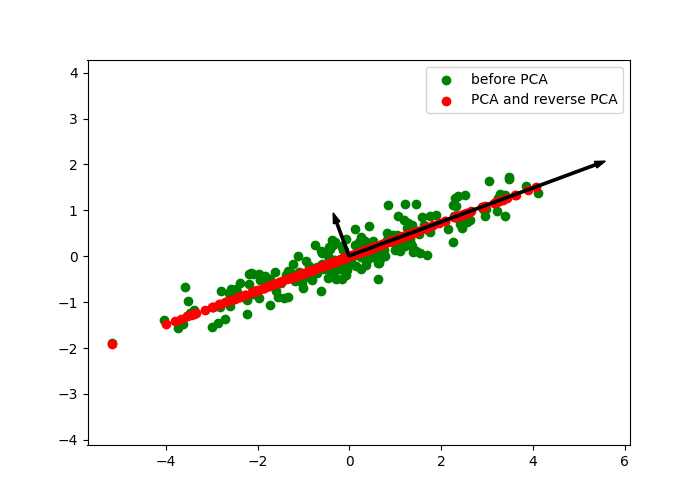

In [914]:
plt.figure(figsize=(7,5))

X_r,w,v,center=my_PCA(X,n_dims=1)
X_r=my_PCA_reverse(X_r,v,n_dims=1)

plt.scatter(X[:,0],X[:,1],c='green',label='before PCA')
plt.scatter(X_r[:,0],X_r[:,1],c='red',label='PCA and reverse PCA')

vec=calc_vectors(w,v,center)

v1=vec[:,0]
v2=vec[:,1]

style={'length_includes_head':False,
       'width':0.05,
       'color':'black'
       }

plt.arrow(x=center[0],y=center[1],dx=v1[0],dy=v1[1],**style)
plt.arrow(x=center[0],y=center[1],dx=v2[0],dy=v2[1],**style)

plt.legend()
plt.axis('equal')
plt.show()


# Zad2 Iris

In [915]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

In [916]:
X_r,w,v,center=my_PCA(X,n_dims=2)

### wizualizacja obiektów

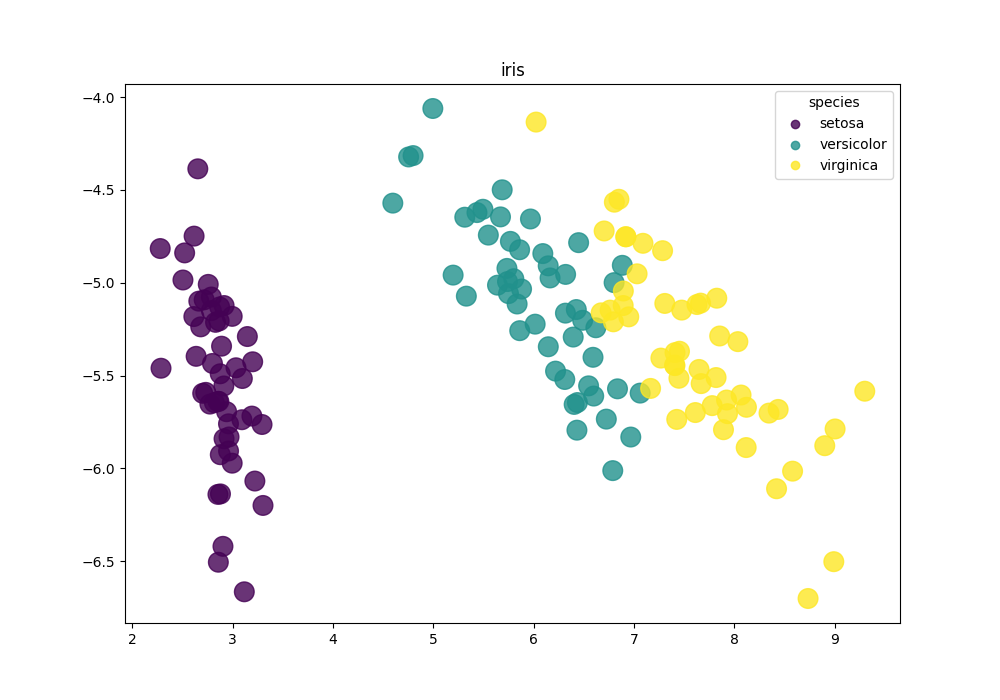

In [917]:
plt.figure(figsize=(10,7))
scat=plt.scatter(X_r[:,0],X_r[:,1],c=y,s=200,alpha=0.8)

plt.title('iris')
plt.legend(handles=scat.legend_elements()[0], labels=iris.target_names.tolist(), title="species")

plt.show()

### Skumulowana wariancja

[]

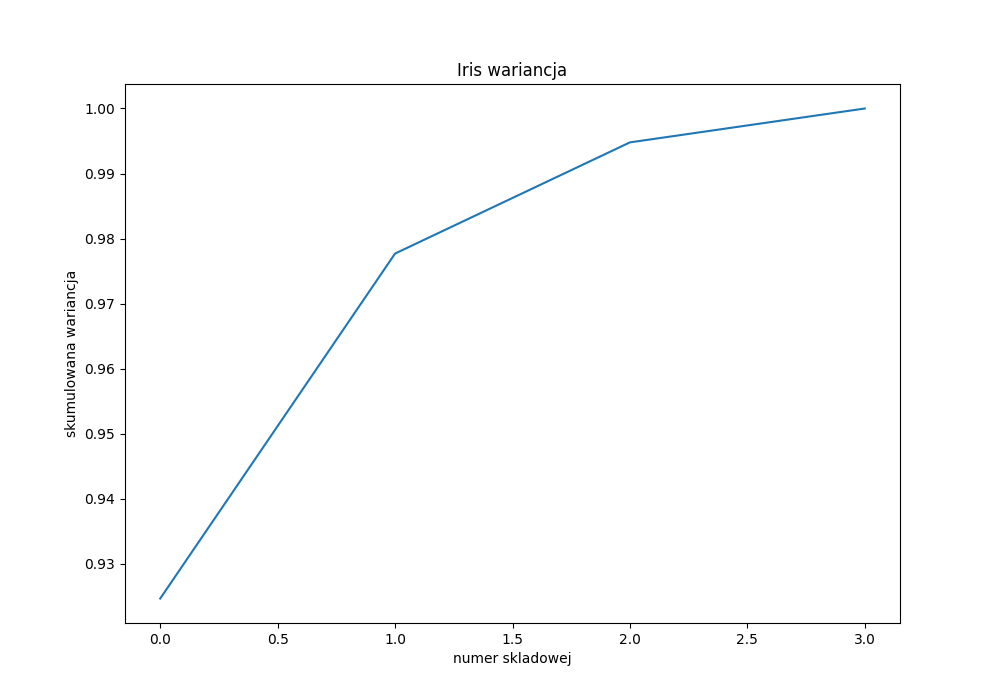

In [918]:
plt.figure(figsize=(10,7))

vars=w/sum(w)
vars=vars.cumsum()

plt.plot(np.arange(len(vars)),vars)
plt.title('Iris wariancja')
plt.xlabel('numer skladowej')
plt.ylabel('skumulowana wariancja')
plt.plot()

# Zad3 Digits

In [919]:
digits=datasets.load_digits()
X=digits.data
y=digits.target

n_dims=2
X_r,w,v,center=my_PCA(X,n_dims=n_dims)
X_reverse=my_PCA_reverse(X_r,v,n_dims=n_dims)

### Przestrzeń cech

[[0.         0.        ]
 [0.69476803 0.38794313]]


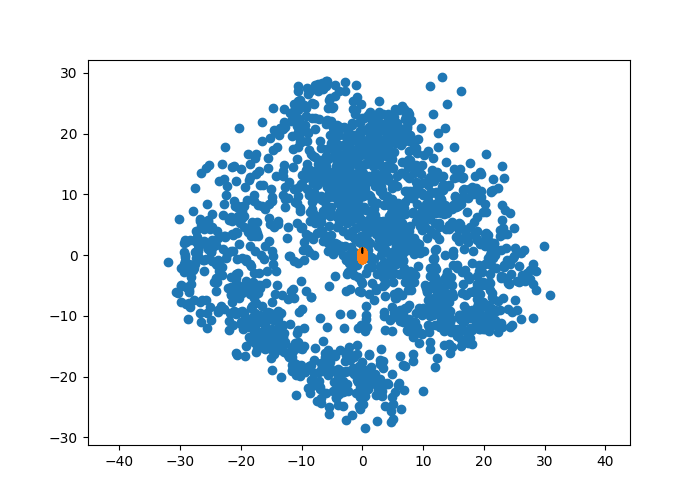

In [920]:
plt.figure(figsize=(7,5))

vec=calc_vectors(w,v,center,n_dims=n_dims)
print(vec)
v1=vec[:,0]
v2=vec[:,1]

style={'length_includes_head':False,
       'width':0.05,
       'color':'black'
       }

plt.scatter(X_r[:,0],X_r[:,1])
plt.scatter(X_reverse[:,0],X_reverse[:,1])

plt.arrow(x=center[0],y=center[1],dx=v1[0],dy=v1[1],**style)
plt.arrow(x=center[0],y=center[1],dx=v2[0],dy=v2[1],**style)

plt.axis('equal')
plt.show()

### wizualizacja obiektów

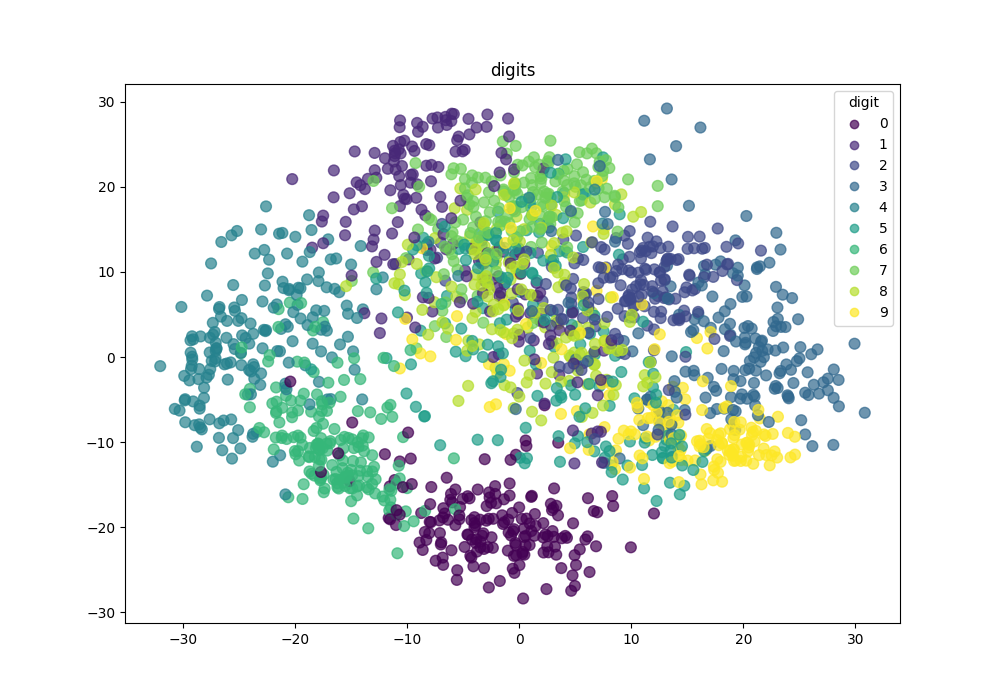

In [921]:
plt.figure(figsize=(10,7))

scat=plt.scatter(X_r[:,0],X_r[:,1],c=y,s=60,alpha=0.7)

plt.title('digits')
plt.legend(handles=scat.legend_elements()[0], labels=digits.target_names.tolist(), title="digit")
plt.show()

### Skumulowana wariancja

[]

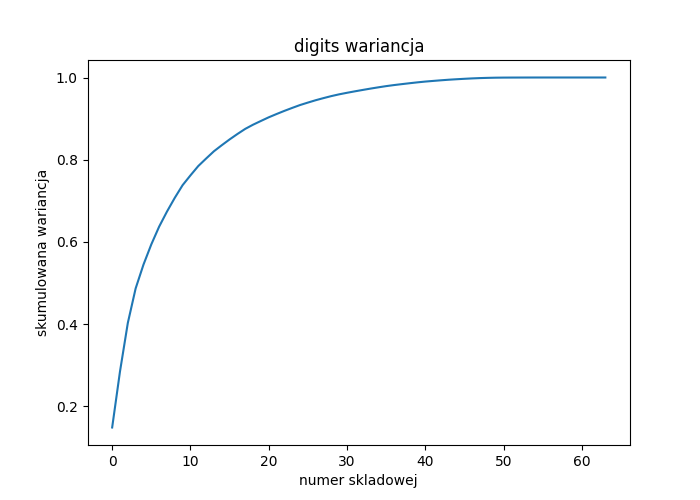

In [922]:
plt.figure(figsize=(7,5))

vars=w/sum(w)
vars=vars.cumsum()

plt.plot(np.arange(len(vars)),vars)
plt.title('digits wariancja')
plt.xlabel('numer skladowej')
plt.ylabel('skumulowana wariancja')
plt.plot()

### odleglosc miedzy probkami wg ilosci skladowych

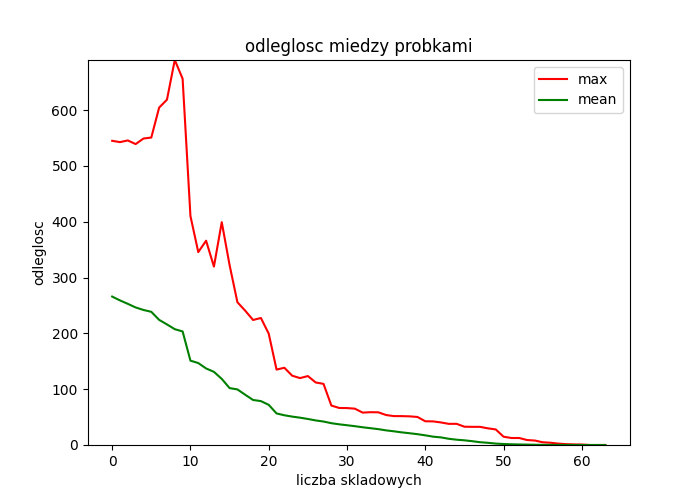

In [924]:
plt.figure(figsize=(7,5))
plt.title('odleglosc miedzy probkami')
plt.ylabel('odleglosc')
plt.xlabel('liczba skladowych')

df=pd.DataFrame(columns=['n_dims','max','mean'])

for n_dims in range(X.shape[1]):
    X_r,w,v,center=my_PCA(X,n_dims=n_dims)
    X_reverse=my_PCA_reverse(X_r,v,n_dims=n_dims)

    dist=np.sqrt(np.power((X-X_reverse),2).sum(axis=0))
    
    maximum=dist.max()
    mean=dist.mean()
    
    df=df.append({'n_dims':n_dims,'max':maximum,'mean':mean},ignore_index=True)

plt.ylim(bottom=0,top=df['max'].max())
plt.plot(df['n_dims'],df['max'],color='red',label='max')
plt.plot(df['n_dims'],df['mean'],color='green',label='mean')
plt.legend()

plt.show()